# Plotting with Dataframes

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
def tweak_siena_pres(df):
    def int64_to_uint8(df_):
        cols = df_.select_dtypes('int64')
        return (df_.astype({col:'uint8' for col in cols}))
    return (
    df    
    # Rename the columns
    .rename(columns={'Seq.': 'Seq'})
    .rename(columns={k:v.replace(' ', '_') for k, v in 
            {
                'Bg': 'Background',
                'PL': 'Party leadership', 
                'CAb': 'Communication ability',
                'RC': 'Relations with Congress', 
                'CAp': 'Court appointments',
                'HE': 'Handling of economy', 
                'L': 'Luck',
                'AC': 'Ability to compromise', 
                'WR': 'Willing to take risks',
                'EAp': 'Executive appointments', 
                'OA': 'Overall ability',
                'Im': 'Imagination', 
                'DA': 'Domestic accomplishments',
                'Int': 'Integrity', 
                'EAb': 'Executive ability',
                'FPA': 'Foreign policy accomplishments',
                'LA': 'Leadership ability',
                'IQ': 'Intelligence', 
                'AM': 'Avoid crucial mistakes',
                'EV': "Experts' view", 
                'O': 'Overall'}.items()
            })
    .astype({'Party':'category'})
    .pipe(int64_to_uint8)
    .assign(Average_rank = lambda df_:(df_.select_dtypes('uint8')
                .sum(axis=1).rank(method='dense').astype('uint8')),
                Quartile=lambda df_:pd.qcut(df_.Average_rank, 4, labels ='1st 2nd 3rd 4th'.split())
            )

)

In [21]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/siena2018-pres.csv'

pres_df = pd.read_csv(url)

In [22]:
pres_df = (
        pres_df
        # Drop the unused columns
        .drop(['Unnamed: 0', 'Seq.'], axis = 1)
        # Clean the data
        .pipe(tweak_siena_pres)
)

pres_df.head()

President                  Party  Background  Imagination  \
0  George Washington            Independent           7            7   
1         John Adams             Federalist           3           13   
2   Thomas Jefferson  Democratic-Republican           2            2   
3      James Madison  Democratic-Republican           4            6   
4       James Monroe  Democratic-Republican           9           14   

   Integrity  Intelligence  Luck  Willing_to_take_risks  \
0          1            10     1                      6   
1          4             4    24                     14   
2         14             1     8                      5   
3          7             3    16                     15   
4         11            18     6                     16   

   Ability_to_compromise  Executive_ability  ...  Court_appointments  \
0                      2                  2  ...                   1   
1                     31                 21  ...                   4   
2                     14                  6  ...                   7   
3                      6                 13  ...                   6   
4                      7                 10  ...                  11   

   Handling_of_economy  Executive_appointments  Domestic_accomplishments  \
0                    1                       1                         2   
1                   13                      15                        19   
2                   20                       4                         6   
3                   14                       7                        11   
4                    9                       9                        10   

   Foreign_policy_accomplishments  Avoid_crucial_mistakes  Experts'_view  \
0                               2                       1              2   
1                              13                      16             10   
2                               9                       7              5   
3                              19                      11              8   
4                               5                       6              9   

   Overall  Average_rank  Quartile  
0        1             1       1st  
1       14            13       2nd  
2        5             5       1st  
3        7             7       1st  
4        8             8       1st  

[5 rows x 25 columns]

## Line plot

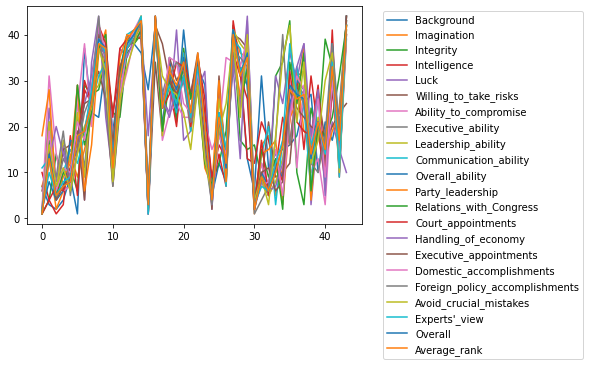

In [23]:
# Default line plot
pres_df.plot().legend(bbox_to_anchor=(1.05, 1))

Text(0, 0.5, 'Rank')

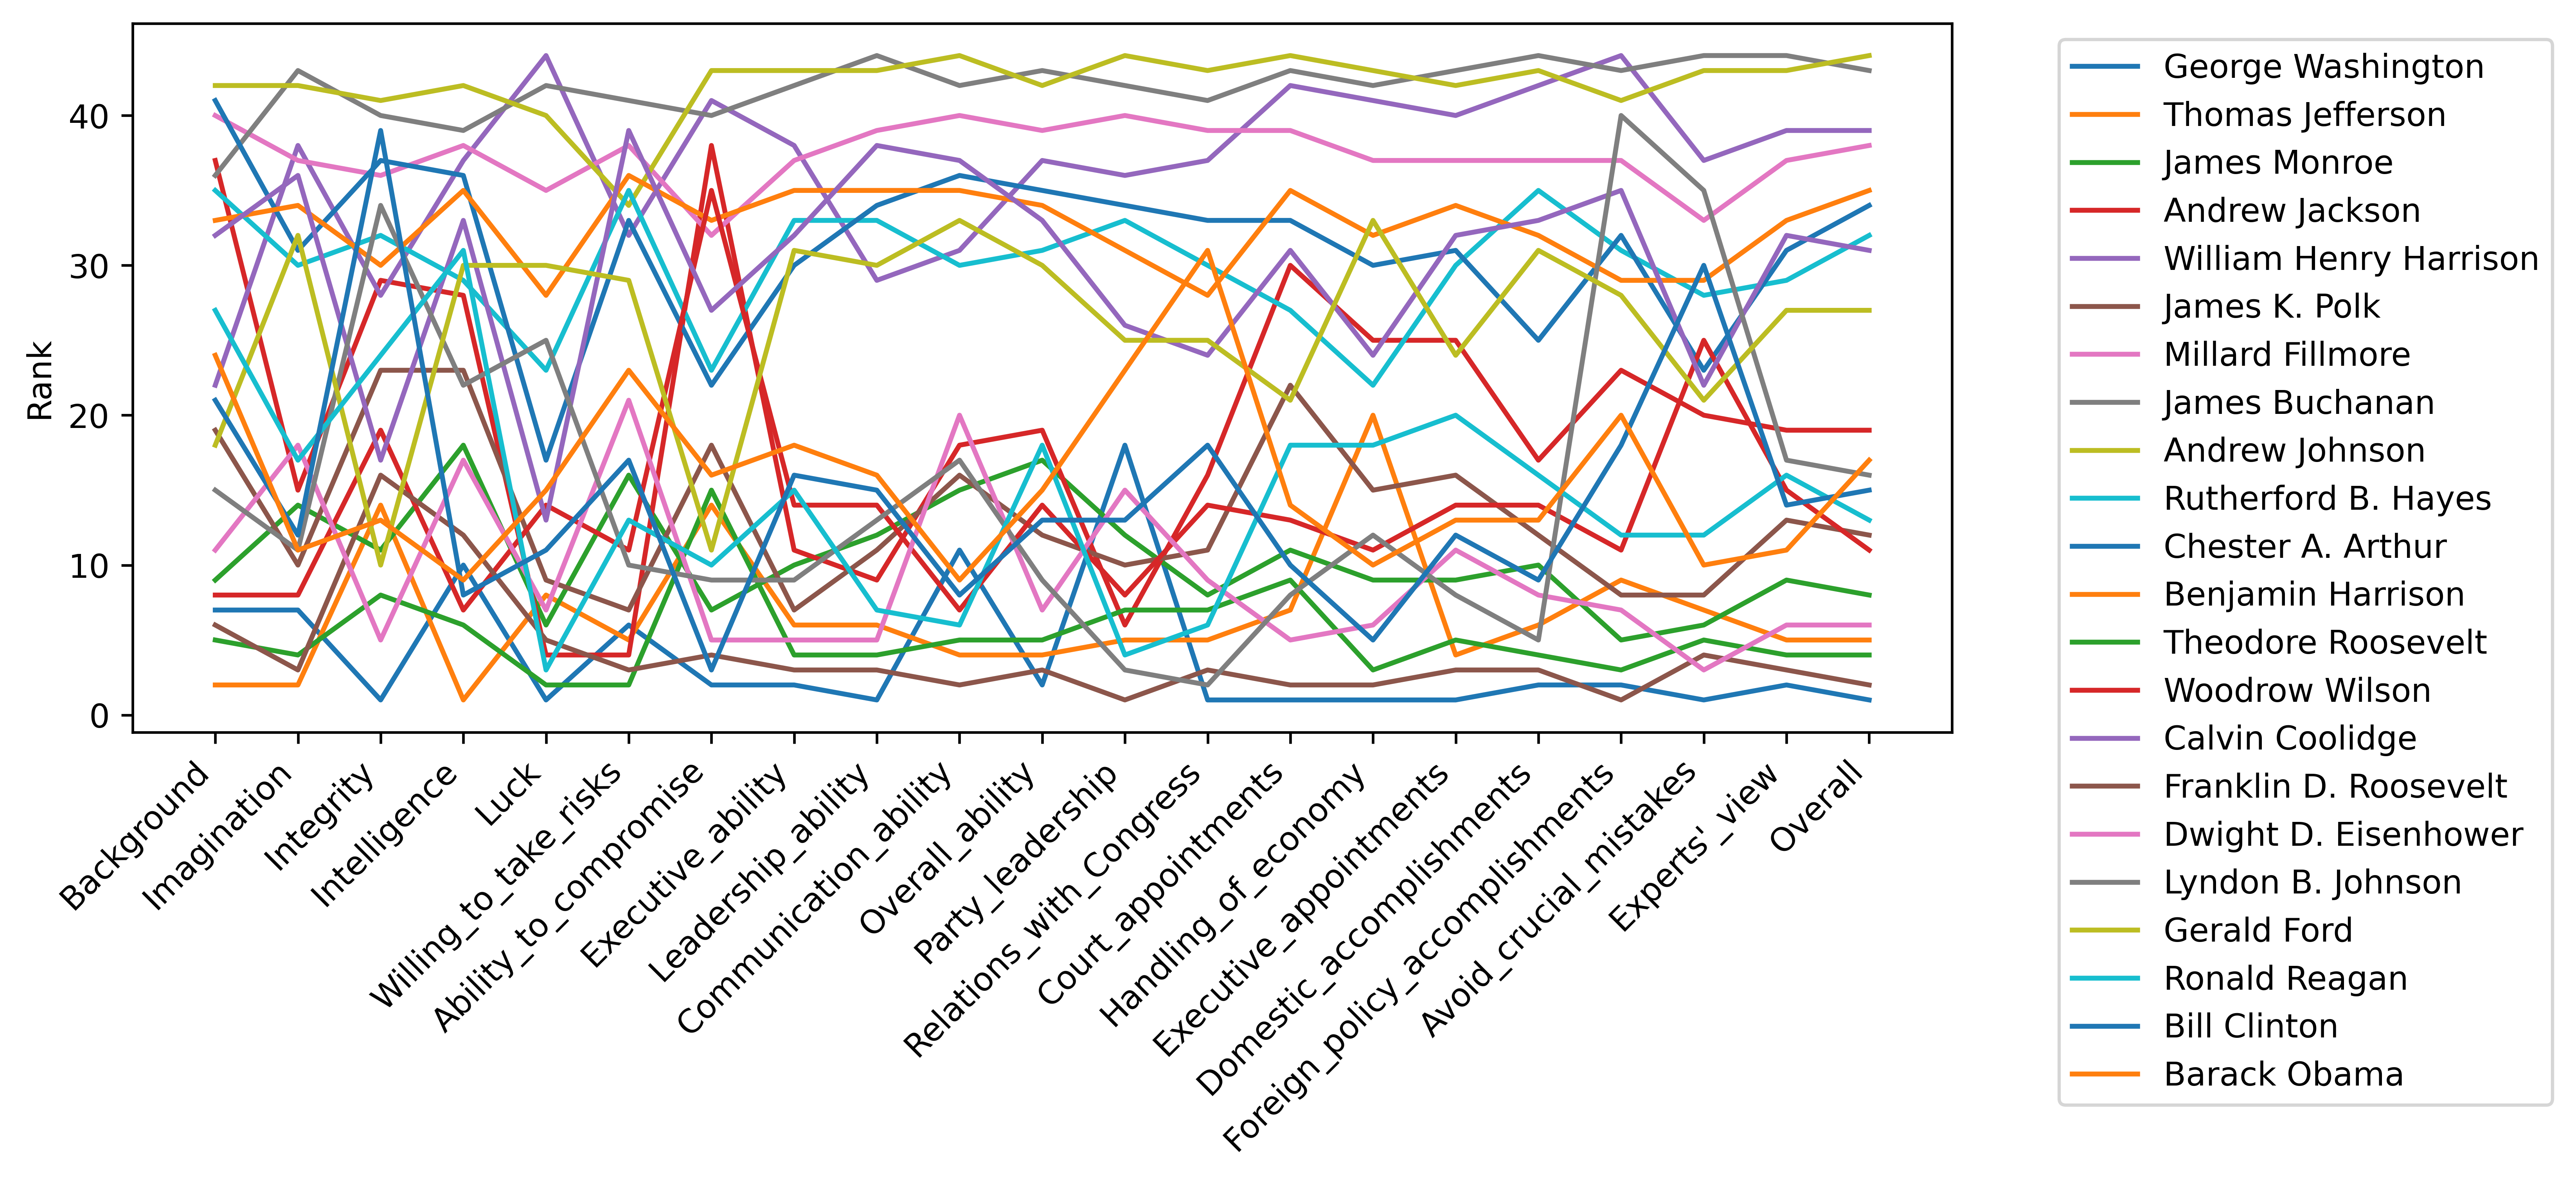

In [31]:
fig, ax = plt.subplots(dpi=600, figsize=(10,4))

(
    pres_df
    .set_index('President')
    # Remove every other president 
    .loc[::2, 'Background':'Overall']
    # Transpose the data
    .T
    # Now plot this
    .plot(ax=ax, rot=45).legend(bbox_to_anchor=(1.05, 1))
)

ax.set_xticks(range(21))
ax.set_xticklabels(pres_df.loc[:, 'Background':'Overall'].columns, ha='right')
ax.set_ylabel('Rank')

> This is still a little hard to read. Generally, we want to pull attention to a single line. Let’s
highlight `Obama`.

In [46]:
colors = []

def set_colors(df):
    for col in df.columns:
        if 'Obama' in col:
            colors.append('#900000')
        else:
            colors.append('#999999')
    return df

Text(0, 0.5, 'Rank')

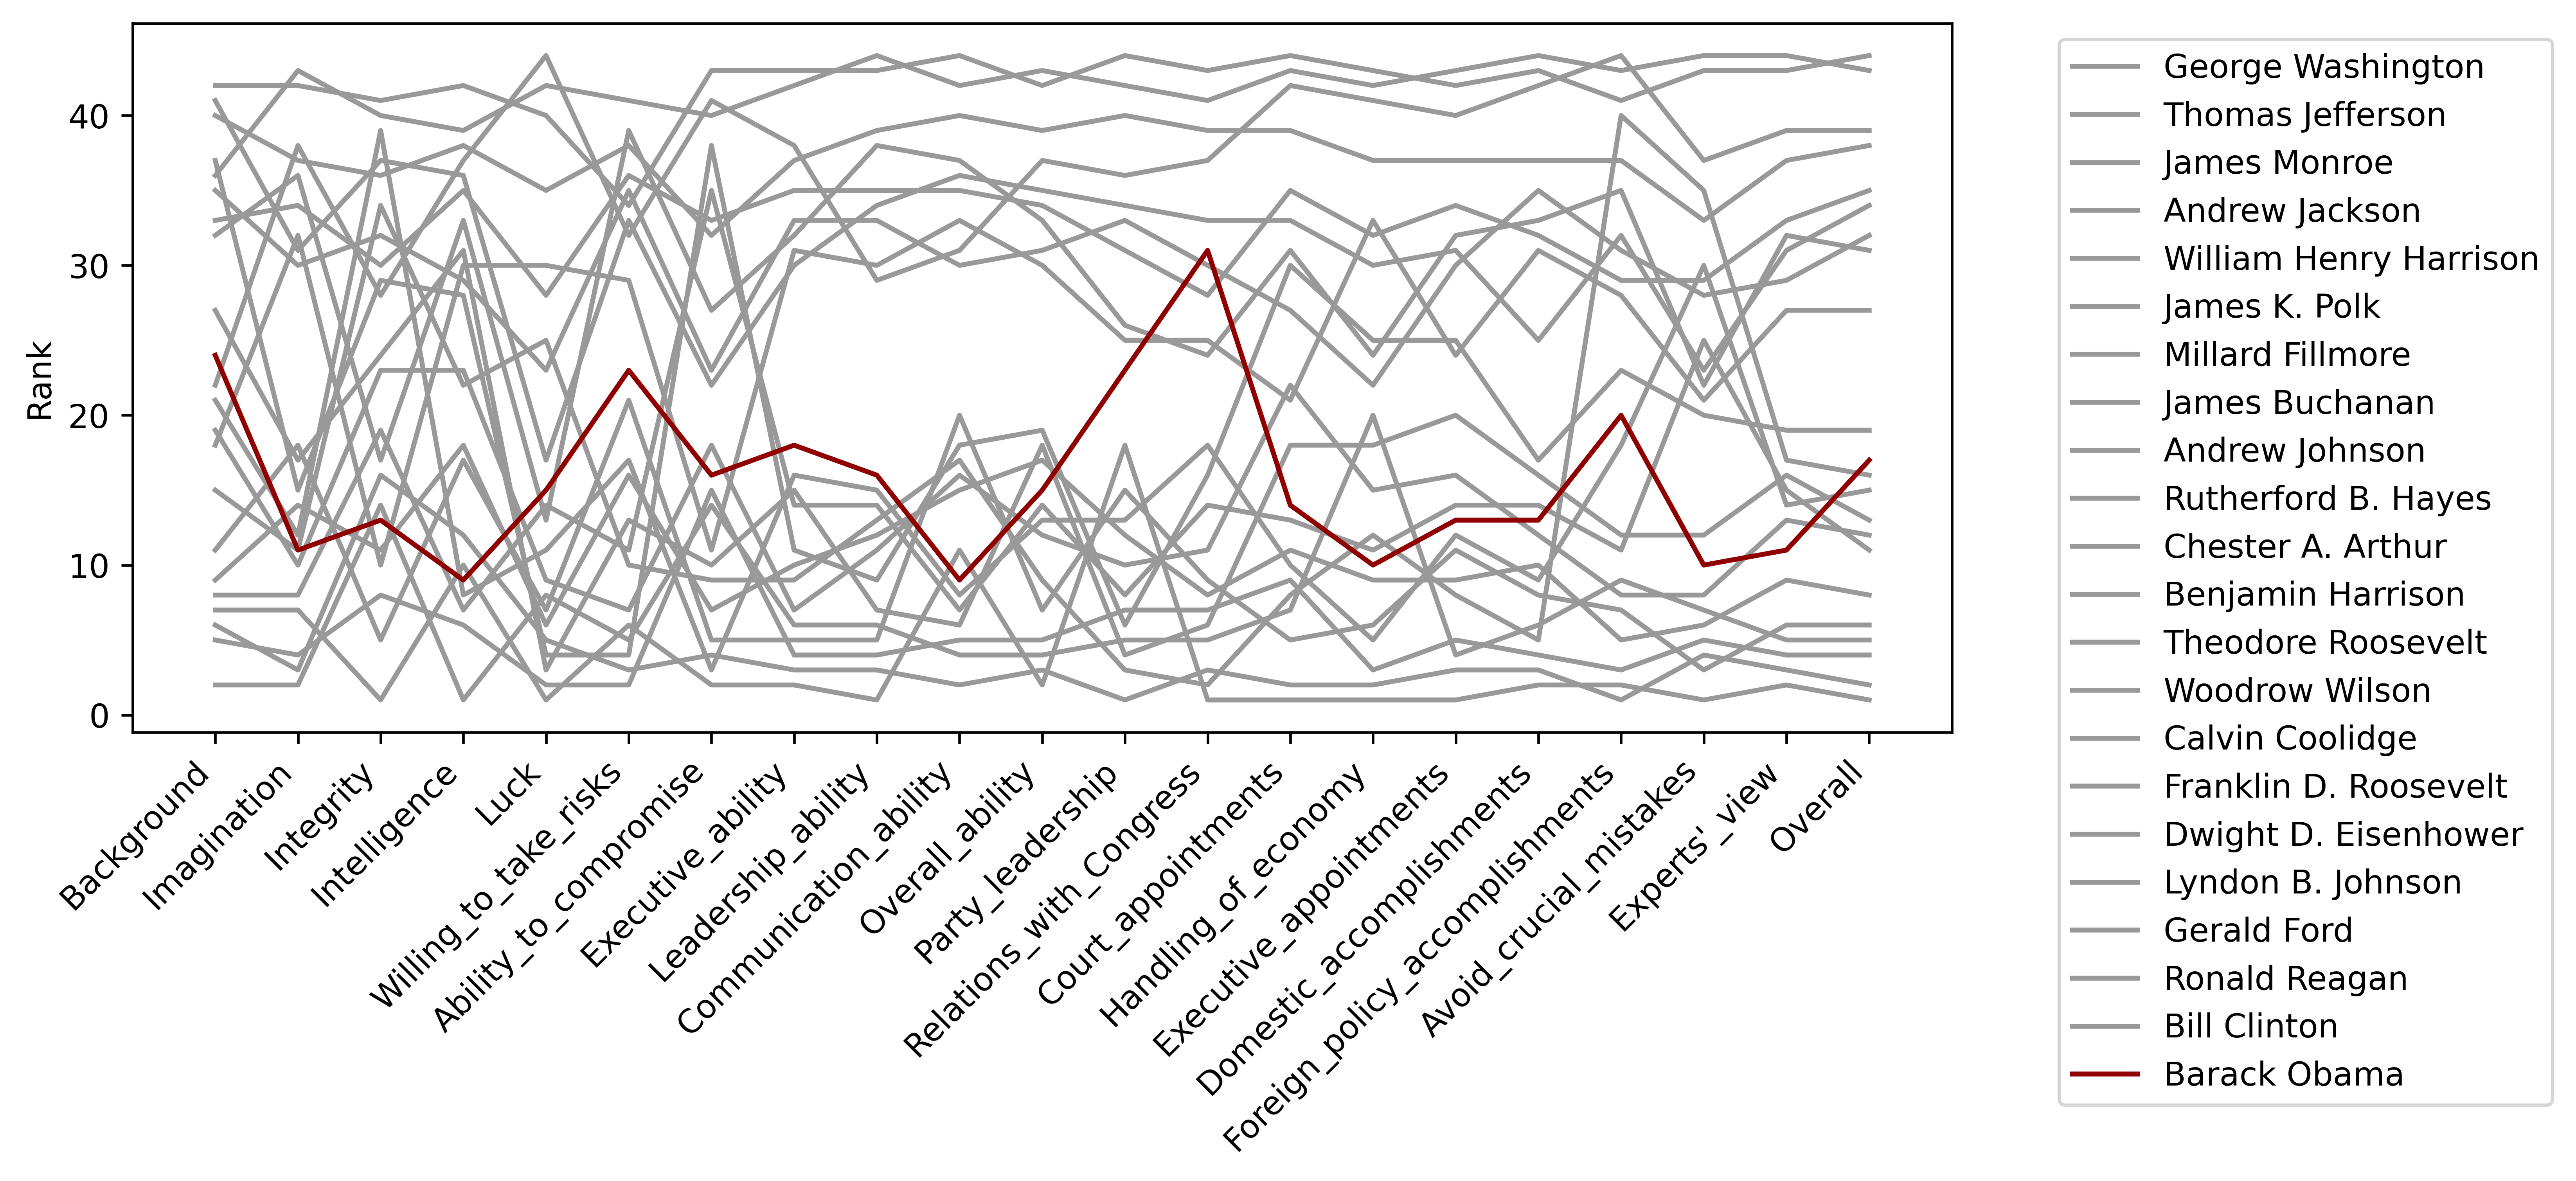

In [47]:
fig, ax = plt.subplots(dpi=600, figsize=(10,4))

(
    pres_df
    .set_index('President')
    # Remove every other president 
    .loc[::2, 'Background':'Overall']
    # Transpose the data
    .T
    # Set the colors to use
    .pipe(set_colors)
    # Now plot this
    .plot(ax=ax, rot=45, color=colors).legend(bbox_to_anchor=(1.05, 1))
)

ax.set_xticks(range(21))
ax.set_xticklabels(pres_df.loc[:, 'Background':'Overall'].columns, ha='right')
ax.set_ylabel('Rank')

In [35]:
pres_df.head()

President                  Party  Background  Imagination  \
0  George Washington            Independent           7            7   
1         John Adams             Federalist           3           13   
2   Thomas Jefferson  Democratic-Republican           2            2   
3      James Madison  Democratic-Republican           4            6   
4       James Monroe  Democratic-Republican           9           14   

   Integrity  Intelligence  Luck  Willing_to_take_risks  \
0          1            10     1                      6   
1          4             4    24                     14   
2         14             1     8                      5   
3          7             3    16                     15   
4         11            18     6                     16   

   Ability_to_compromise  Executive_ability  ...  Court_appointments  \
0                      2                  2  ...                   1   
1                     31                 21  ...                   4   
2                     14                  6  ...                   7   
3                      6                 13  ...                   6   
4                      7                 10  ...                  11   

   Handling_of_economy  Executive_appointments  Domestic_accomplishments  \
0                    1                       1                         2   
1                   13                      15                        19   
2                   20                       4                         6   
3                   14                       7                        11   
4                    9                       9                        10   

   Foreign_policy_accomplishments  Avoid_crucial_mistakes  Experts'_view  \
0                               2                       1              2   
1                              13                      16             10   
2                               9                       7              5   
3                              19                      11              8   
4                               5                       6              9   

   Overall  Average_rank  Quartile  
0        1             1       1st  
1       14            13       2nd  
2        5             5       1st  
3        7             7       1st  
4        8             8       1st  

[5 rows x 25 columns]

## Bar Plots

>Remember that pandas will plot the index on the x-axis.

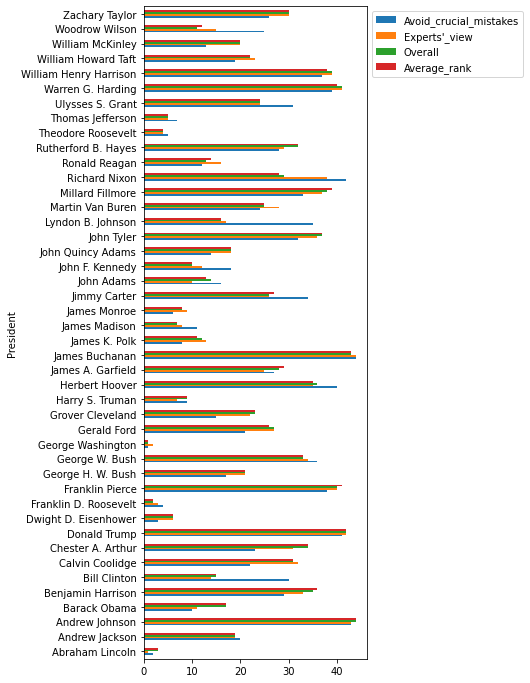

In [51]:
# fig, ax = plt.subplots(dpi=600, figsize=(10,4))

(
    pres_df
    .set_index('President')
    .sort_index()
    .iloc[:, -5:-1]
    .plot.barh(figsize=(4, 12))
    .legend(bbox_to_anchor=(1,1))
)


## Scatter Plot

A scatter plot is useful to determine the relationship between two columns that are numeric. We
can evaluate what tends to happen to one value as the other value changes. Here is a scatter plot
to example the relationship between Integrity and Avoid crucial mistakes:

<AxesSubplot:xlabel='Integrity', ylabel='Avoid_crucial_mistakes'>

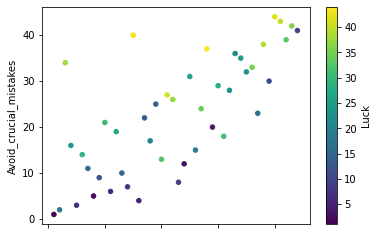

In [52]:
(
    pres_df
    .plot.scatter(x='Integrity', y='Avoid_crucial_mistakes',
                  c='Luck', cmap='viridis'
                  )
)

> Another mechanism to visualize relationships between two continuous values as well as
density (where the values overlap), is a hexbin plot. You should choose an appropriate colormap
that is continuous and increasing from white to dark for this plot:

<AxesSubplot:xlabel='Integrity', ylabel='Avoid_crucial_mistakes'>

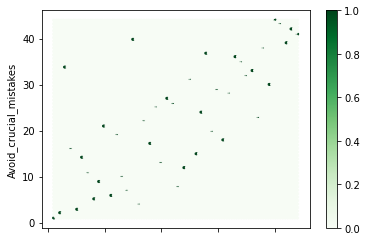

In [53]:
(
    pres_df
    .plot.hexbin(x='Integrity', y='Avoid_crucial_mistakes',
                  cmap='Greens'
                  )
)

## Area Plots and Stacked Bar Plots

A dataframe can create stacked area plots with the method. This plot is useful when you
`.area` want to understand each column’s relative contribution and the order of the data is important.

<AxesSubplot:xlabel='President'>

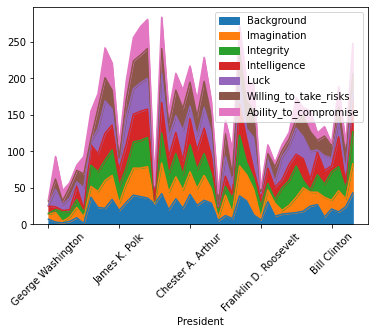

In [54]:
(
    pres_df
    .plot.area(x='President', y='Background Imagination Integrity Intelligence Luck Willing_to_take_risks Ability_to_compromise'.split(),
               rot=45
               )
)

<AxesSubplot:xlabel='President'>

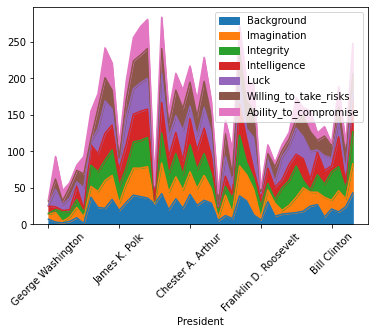

In [55]:
(
    pres_df
    .plot.area(x='President', y='Background Imagination Integrity Intelligence Luck Willing_to_take_risks Ability_to_compromise'.split(),
               rot=45, stacked=True
               )
)

## Column Distributions with KDEs, Histograms, and Boxplots

If you have numeric information in columns, you can run summary statistics on the columns with
`.describe`. To visualize the distribution for each column, you can plot with `.hist` or `.density`.

<AxesSubplot:ylabel='Density'>

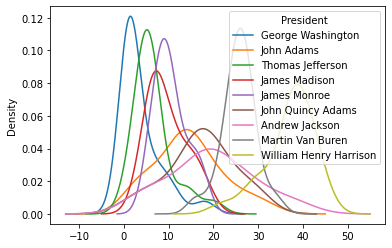

In [59]:
(
    pres_df
    .set_index('President')
    .loc[:, 'Background':'Average_rank']
    .iloc[:9]
    .T
    # .describe()
    .plot.density()
)

<AxesSubplot:ylabel='Frequency'>

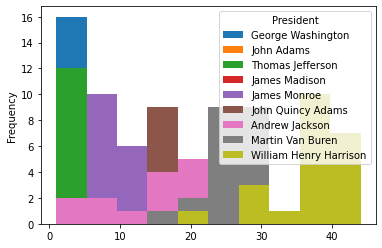

In [60]:
(
    pres_df
    .set_index('President')
    .loc[:, 'Background':'Average_rank']
    .iloc[:9]
    .T
    # .describe()
    .plot.hist()
)

<AxesSubplot:>

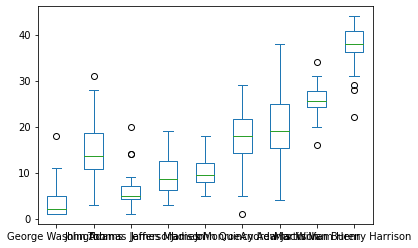

In [61]:
(
    pres_df
    .set_index('President')
    .loc[:, 'Background':'Average_rank']
    .iloc[:9]
    .T
    # .describe()
    .plot.box()
)